# Introduction

The main goal of this Jupyter Notebook is to build a deep learning model that will predict if a Covid-19 patient has a high mortality, based on the patient's symptoms, health condition, and medical history. We use a convolutional neural network to accomplish this. Then, we evaluate our model using a confusion matrix and classification report.

One of the [author](https://github.com/virchan)'s portfolio projects on data science and machine learning. No medical advice is given here. Use at your own risk.

Dataset Source: [https://www.kaggle.com/datasets/meirnizri/covid19-dataset](https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

Dataset Backup: [web archive](https://web.archive.org/web/20221206060454/https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

# Table of Contents

1. [About Dataset (Copied From Source)](#About_Dataset)
2. [Setting up the Environment](#envir_init)
3. [Exploratory Data Analysis](#eda)
4. [Predicting Patient's Risk with Deep Learning](#dl)
5. [Model Evaluation](#evaluation)

## About Dataset (Copied From Source) <a name = "About_Dataset"></a>

### Context

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

**The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.**

### Content
The dataset was provided by the Mexican government ([link](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico)). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. **In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.**

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# Setting up the Environment <a name = "envir_init"></a>

## Loading Imports

We start by importing the standard libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We use the following versions:

<img src="img/libraries_001.jpg" style="width:100px;"/>

## Loading Dataset and Quick Inspection

We perform a quick inspection to look for `None` or `NaN`.

In [2]:
df = pd.read_csv("Covid Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

`df.info()` shows there are no `None` or `NaN` in the dataset.

In [4]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [5]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

# Exploratory Data Analysis <a name = "eda"></a>

## Data Cleaning: Missing Values in Boolean Features

Our main objective here is to deal with samples with missing values. The dataset density has increased from 7.33% to 97.24% after cleaning.

Boolean features are either indicating

* a medical treatment: `INTUBED`, `ICU`, or
* a health condition: `PNEUMONIA`, `PREGNANT`, `DIABETES`, `COPD`, `ASTHMA`, `INMSUPR`, `HIPERTENSION`, `OTHER_DISEASE`, `CARDIOVASCULAR`, `OBESITY`, `RENAL_CHRONIC`, `TOBACCO`.

These are the features that can contain greater-than-2 values. As pointed out in the dataset description, greater-than-2 values (97, 98, etc) indicate missing data.

In [7]:
boolean_columns = [column for column in df.columns if column not in {'AGE',
                                                                     'SEX',
                                                                     'CLASIFFICATION_FINAL',
                                                                     'MEDICAL_UNIT',
                                                                     'PATIENT_TYPE',
                                                                     'DATE_DIED',
                                                                     'USMER'}]

In [8]:
df[boolean_columns].nunique()

INTUBED           4
PNEUMONIA         3
PREGNANT          4
DIABETES          3
COPD              3
ASTHMA            3
INMSUPR           3
HIPERTENSION      3
OTHER_DISEASE     3
CARDIOVASCULAR    3
OBESITY           3
RENAL_CHRONIC     3
TOBACCO           3
ICU               4
dtype: int64

It turns out that all Boolean features have missing values! We have to decide if we need to drop them, or replace them with suitable values. Can we get good results based on the dense part of the dataset? (I.e., samples with no missing values.)

In [9]:
dense_df = df

for boolean_column in boolean_columns:
    dense_df = dense_df[dense_df[boolean_column] <= 2]

In [10]:
len(dense_df) / len(df) * 100

7.327277495648857

Only 7.33% of the dataset has no missing values. Therefore, we need to replace some missing values. 

## `ASTHMA`

Start with the `ASTHMA` column. A quick summary is:

* There are undefined values on the `ASTHMA` column: 98.
* The `ASTHMA` column has a sparsity 0.28%.

<img src="img/sns_coutplot_asthma.png" style="width:400px;"/>

This bar chart indicates the counts for each unique value in the `ASTHMA` column.

In [11]:
df["ASTHMA"].unique()

array([ 2,  1, 98], dtype=int64)

Recall the value 1 (resp. 2) means the patient has (resp. does not have) asthma. Note that this is a medical condition. Therefore, we do not recommend replacing its values before consulting with medical doctors. Let's plot the frequency.

<AxesSubplot: xlabel='ASTHMA', ylabel='count'>

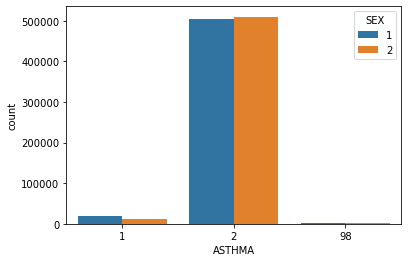

In [12]:
plt.figure(figsize = (6, 4))

sns.countplot(data = df,
             x = "ASTHMA",
             hue = "SEX"
            )

It seems that we do not have that much missing data here. More precisely,

In [13]:
len(df[df["ASTHMA"] > 2]) / len(df) * 100

0.28409984979615194

0.28% of the dataset has a missing value in `ASTHMA`. For our purpose, it seems reasonable to drop samples with missing values in `ASTHMA`.

## `PREGNANT`

Can we reach the same conclusion for every feature here? Let's look at the `PREGNANT` column.

Quick summary:
* There are undefined values on the `PREGNANT` column: 97, 98.
* The `PREGNANT` has sparsity 50%.
* The status `PREGNANT` = 97, 98 apply to both male and female.
* If `PREGNANT` = 97, 98 and `SEX` = male, then can replace the value with 2.

In [14]:
df["PREGNANT"].unique()

array([ 2, 97, 98,  1], dtype=int64)

This time we have two different values 97 and 98 indicating a missing value. But if these values are rare, say, only <1\% of the dataset has this issue, then we can drop them safely. Of course, we know this is too optimistic:

In [15]:
len(df[df["PREGNANT"] > 2]) / len(df) * 100

50.283956798512264

It turns out that 50% of the dataset has a `PREGNANT` value of 97, 98, which prevents us to drop them. We need to replace 97 and 98 with something that best-fit in our situation here. But before that, we need to confirm if 97 and 98 are indicating two different conditions.

In [16]:
df[df["PREGNANT"] > 2]["SEX"].unique()

array([2, 1], dtype=int64)

The condition `PREGNANT` = 97, 98 apply to both male and female. Therefore, we have to replace missing values with 2 for male samples.

In [17]:
df.loc[df["SEX"] == 2, "PREGNANT"] = 2

Here is a quick double check:

In [18]:
df[df["PREGNANT"] > 2]["SEX"].unique()

array([1], dtype=int64)

As a result, only female samples can have missing values in `PREGNANT`. Let's see how much the density has improved.

In [19]:
dense_df = df

for boolean_column in boolean_columns:
    dense_df = dense_df[dense_df[boolean_column] <= 2]
    
print(len(dense_df) / len(df) * 100)

18.051260043392222


It has not improved much. We have to work more.

## `PATIENT_TYPE`, `INTUBED`, and `ICU`

The dense part `dense_df` also brings something new to the table.

In [20]:
dense_df["PATIENT_TYPE"].unique()

array([2], dtype=int64)

What this said is the dense part only consists of hospitalised samples. What about patients who left the hospitals? This leads to an intriguing observation.

In [21]:
not_hospitalised_df = df[df["PATIENT_TYPE"] == 1]

for boolean_column in boolean_columns:
    print(boolean_column)
    print("\n")
    print(f"The unique values are: {not_hospitalised_df[boolean_column].unique()}")
    print("\n")
    print(f"{len(not_hospitalised_df[not_hospitalised_df[boolean_column] > 2]) / len(df) * 100}% of the data has undefined values")
    print("\n")
    print("--------------------------")

INTUBED


The unique values are: [97]


80.92353908876332% of the data has undefined values


--------------------------
PNEUMONIA


The unique values are: [ 1  2 99]


1.0355959278067854% of the data has undefined values


--------------------------
PREGNANT


The unique values are: [ 2  1 98]


0.31156569630212433% of the data has undefined values


--------------------------
DIABETES


The unique values are: [ 2  1 98]


0.20437260091075984% of the data has undefined values


--------------------------
COPD


The unique values are: [ 2  1 98]


0.18491762630236272% of the data has undefined values


--------------------------
ASTHMA


The unique values are: [ 2  1 98]


0.182438070715018% of the data has undefined values


--------------------------
INMSUPR


The unique values are: [ 2  1 98]


0.2025606179815464% of the data has undefined values


--------------------------
HIPERTENSION


The unique values are: [ 1  2 98]


0.19054431013518347% of the data has undefined values


--

The columns `INTUBED` and `ICU` both have a unique value of 97. What does it mean? If a patient is discharged from the hospital, then obviously the patient is neither connected to the ventilator, nor admitted to the ICU. In other words, if `PATIENT_TYPE` = 1, then `INTUBED` = 2 = `ICU`.

As a result, for samples with `PATIENT_TYPE` = 1 (returned home), we can replace their `INTUBED` and `ICU` values with 2.

In [22]:
df.loc[df["PATIENT_TYPE"] == 1, ["INTUBED", "ICU" ]] = 2

Let's see how much the density has improved.

In [23]:
dense_df = df

for boolean_column in boolean_columns:
    dense_df = dense_df[dense_df[boolean_column] <= 2]
    
print(len(dense_df) / len(df) * 100)

97.24302028944042


The dataset density has increased from 7.33% to 97.24%.

## Data Cleaning: Adding New Columns

The `DATE_DIED` column contains strings of dates. There is a special value on the DATE_DIED column "99/99/9999" (still alive). Therefore, we can add a new column `SURVIVED` to indicate if the patient is still alive, and drop the `DATE_DIED` column.

In [24]:
def survive(row):
    if "9999" in row:
        return 1
    else:
        return 0
    
df["SURVIVED"] = df["DATE_DIED"].apply(survive)
df["SURVIVED"] = df["SURVIVED"].astype("category")

df = df.drop("DATE_DIED", axis = 1)

Finally, we add the `AGE_GROUP` column for later analysis.

In [25]:
def age_group_function(age):
    if 0 <= age < 10:
        return "[0, 10)"
    
    elif age < 20:
        return "[10, 20)"
    
    elif age < 30:
        return "[20, 30)"
    
    elif age < 40:
        return "[30, 40)"
    
    elif age < 50:
        return "[40, 50)"
    
    elif age < 60:
        return "[50, 60)"
    
    elif age < 70:
        return "[60, 70)"
    
    elif age < 80:
        return "[70, 80)"
    
    return "80+"

In [26]:
df["AGE_GROUP"] = df["AGE"].apply(age_group_function)

In [27]:
df[["AGE", "AGE_GROUP"]].head()

,AGE,AGE_GROUP
0,65,"[60, 70)"
1,72,"[70, 80)"
2,55,"[50, 60)"
3,53,"[50, 60)"
4,68,"[60, 70)"


In [28]:
age_group_order_list = ["[0, 10)",
                        "[10, 20)",
                        "[20, 30)",
                        "[30, 40)",
                        "[40, 50)",
                        "[50, 60)",
                        "[60, 70)",
                        "[70, 80)",
                        "80+"]

<Figure size 864x432 with 0 Axes>

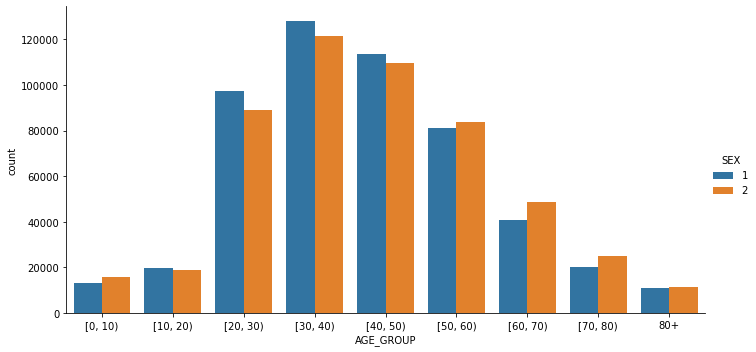

In [29]:
plt.figure(figsize = (12, 6))

sns.catplot(data = df, 
             x = "AGE_GROUP",
             hue = "SEX",
             kind = "count",
             order = age_group_order_list,
             aspect = 2
            )

<Figure size 864x432 with 0 Axes>

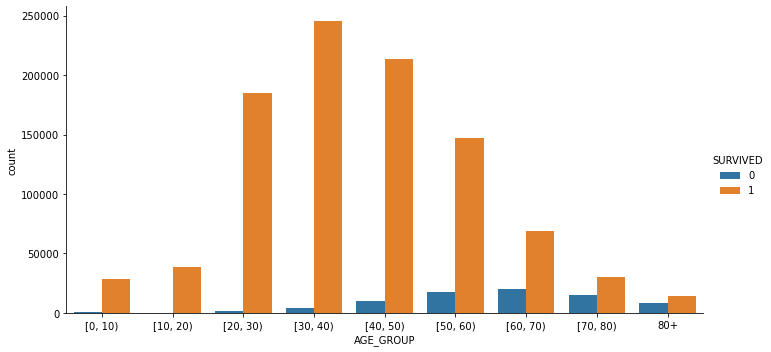

In [30]:
plt.figure(figsize = (12, 6))

sns.catplot(data = df, 
             x = "AGE_GROUP",
             hue = "SURVIVED",
             kind = "count",
             order = age_group_order_list,
             aspect = 2
            )

The dataset is normally-distributed among the age groups.

Note that `pandas.cut` does not display `labels` correctly because of this [bug](https://github.com/pandas-dev/pandas/issues/21233):

<img src="img/pd_cut_bug.jpg" style="width:600px;"/>

In [31]:
dense_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,2,1,65,2,2,...,2,2,1,2,2,2,2,2,3,2
1,2,1,2,1,03/06/2020,2,1,72,2,2,...,2,2,1,2,2,1,1,2,5,2
2,2,1,2,2,09/06/2020,1,2,55,2,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,2,2,53,2,2,...,2,2,2,2,2,2,2,2,7,2
4,2,1,2,1,21/06/2020,2,2,68,2,1,...,2,2,1,2,2,2,2,2,3,2


In [32]:
dense_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019666 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1019666 non-null  int64 
 1   MEDICAL_UNIT          1019666 non-null  int64 
 2   SEX                   1019666 non-null  int64 
 3   PATIENT_TYPE          1019666 non-null  int64 
 4   DATE_DIED             1019666 non-null  object
 5   INTUBED               1019666 non-null  int64 
 6   PNEUMONIA             1019666 non-null  int64 
 7   AGE                   1019666 non-null  int64 
 8   PREGNANT              1019666 non-null  int64 
 9   DIABETES              1019666 non-null  int64 
 10  COPD                  1019666 non-null  int64 
 11  ASTHMA                1019666 non-null  int64 
 12  INMSUPR               1019666 non-null  int64 
 13  HIPERTENSION          1019666 non-null  int64 
 14  OTHER_DISEASE         1019666 non-null  int64 
 15

In [33]:
dense_df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06,1.019666e+06
mean,1.642442e+00,8.986288e+00,1.500748e+00,1.185630e+00,1.967699e+00,1.866219e+00,4.187069e+01,1.992323e+00,1.880815e+00,1.986007e+00,1.970256e+00,1.986738e+00,1.844597e+00,1.973525e+00,1.980397e+00,1.846958e+00,1.982131e+00,1.919229e+00,5.293803e+00,1.983908e+00
std,4.792813e-01,3.724703e+00,4.999997e-01,3.888083e-01,1.767978e-01,3.404171e-01,1.673451e+01,8.728170e-02,3.240064e-01,1.174608e-01,1.698805e-01,1.143954e-01,3.622885e-01,1.605441e-01,1.386333e-01,3.600284e-01,1.324739e-01,2.724826e-01,1.889092e+00,1.258277e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
50%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00


## Data Visualisation

### Correlations

We compute the correlations among features and display them with heatmaps. Note that our features are categorical (except `AGE`), and `pandas.DataFrame.corr` only consider numerical features. To overcome this, we need to change the columns to the correct data type.

In [34]:
correlation_column_list = boolean_columns + ["SURVIVED"]

# ['INTUBED', 
#  'PNEUMONIA',
#  'PREGNANT',
#  'DIABETES',
#  'COPD',
#  'ASTHMA',
#  'INMSUPR',
#  'HIPERTENSION',
#  'OTHER_DISEASE',
#  'CARDIOVASCULAR',
#  'OBESITY',
#  'RENAL_CHRONIC',
#  'TOBACCO',
#  'ICU',
#  'SURVIVED']

We make a copy of `dense_df` for protection. The main reason is we need to set the column data type to `category` to calculate the correct correlations.

In [35]:
dense_df = df

for boolean_column in boolean_columns:
    dense_df = dense_df[dense_df[boolean_column] <= 2]

In [36]:
correlation_df = dense_df.copy()

By comparing `correlation_df.info()`, `correlation_df.describe()`, and the dataset description, the health condition Boolean features (such as `DIABETES`) should be categorical.

In [37]:
for column in correlation_column_list:
    correlation_df[column] = correlation_df[column].apply(lambda x: x % 2)
    # Silencing "SettingWithCopyWarning". 
    correlation_df.is_copy = False
    correlation_df[column] = correlation_df[column].astype("category")

In [38]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019666 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   USMER                 1019666 non-null  int64   
 1   MEDICAL_UNIT          1019666 non-null  int64   
 2   SEX                   1019666 non-null  int64   
 3   PATIENT_TYPE          1019666 non-null  int64   
 4   INTUBED               1019666 non-null  category
 5   PNEUMONIA             1019666 non-null  category
 6   AGE                   1019666 non-null  int64   
 7   PREGNANT              1019666 non-null  category
 8   DIABETES              1019666 non-null  category
 9   COPD                  1019666 non-null  category
 10  ASTHMA                1019666 non-null  category
 11  INMSUPR               1019666 non-null  category
 12  HIPERTENSION          1019666 non-null  category
 13  OTHER_DISEASE         1019666 non-null  category
 14  CARDIOVASCULAR    

We create a dictionary `SCA_dict` whose values are dictionaries of dataframe. More precisely, the value `SCA_dict[SEX][(PATIENT_TYPE, AGE_GROUP)]` is the correlation dataframe for samples with features `SEX`, `PATIENT_TYPE`, `AGE_GROUP`.

In [39]:
'''
Sex-Classification-Age Dictionary.
Dictionary of dictionaries of dataframes.
This is used to store correlateion dataframes.
SCA_dict[SEX][(CLASSIFICATION_FINAL, AGE_GROUP)] is the 
correlation dataframe for samples with SEX, CLASSIFICATION_FINAL, AGE_GROUP.
SEX takes value in {0,1}, where 1 means males and females' correlations are
separated.
'''

SCA_dict = {}

Recall the `age_group_order_list` defined before. We compute the correlations for each age group. Then, we organise the corresponding heatmaps using `Slider` from `matplotlib.widgets`. We prepare `classification_list` for the same reason.

In [40]:
age_group_order_list = ["[0, 10)",
                        "[10, 20)",
                        "[20, 30)",
                        "[30, 40)",
                        "[40, 50)",
                        "[50, 60)",
                        "[60, 70)",
                        "[70, 80)",
                        "80+"
                       ]

In [41]:
classifications_list = correlation_df["CLASIFFICATION_FINAL"].unique()
classifications_list.sort()

We break down the workflow into two parts. Firstly, we compute correlations regardless the sex. Our columns are categorical, and therefore we need to use `pd.factorize` when computing the correlations. Also note that `Pandas 1.5.0` or higher is needed in order to use keyword argument `pd.corr(numeric_only = False)`.

In [42]:
classification_age_dict = {}

# All correlations
all_corr_df = correlation_df[correlation_column_list]
all_corr_df = all_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)

classification_age_dict[("a", "a")] = all_corr_df

# All age, for each patient classification
for classification in classifications_list:
    df_key = (classification, "a")
    classification_corr_df = correlation_df[correlation_df["CLASIFFICATION_FINAL"] == classification]
    classification_corr_df = classification_corr_df[correlation_column_list]
    if not classification_corr_df.empty:
        classification_corr_df = classification_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
    classification_age_dict[df_key] = classification_corr_df

# All patient type, for each age group
for age_group in age_group_order_list:
    df_key = ("a", age_group)
    age_group_corr_df = correlation_df[correlation_df["AGE_GROUP"] == age_group]
    age_group_corr_df = age_group_corr_df[correlation_column_list]
    if not age_group_corr_df.empty:
        age_group_corr_df = age_group_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
    classification_age_dict[df_key] = age_group_corr_df
    
# Each patient type and each age group
for classification in classifications_list:
    for age_group in age_group_order_list:
        df_key = (classification, age_group)
        corr_df = correlation_df[(correlation_df["CLASIFFICATION_FINAL"] == classification) & (correlation_df["AGE_GROUP"] == age_group)]
        corr_df = corr_df[correlation_column_list]
        if not corr_df.empty:
            corr_df = corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
        classification_age_dict[df_key] = corr_df
    
SCA_dict[0] = classification_age_dict

To illustrate, the following value gives the correlation dataframe for all patient types in the age group \[40, 50\).

In [43]:
SCA_dict[0][("a", "[40, 50)")].head()

,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,SURVIVED
INTUBED,1.000000,0.316286,0.002203,0.082919,0.016490,-0.002634,0.027361,0.058868,0.024441,0.019903,0.049428,0.052002,0.009154,0.396697,-0.514108
PNEUMONIA,0.316286,1.000000,0.001711,0.143501,0.035767,-0.003370,0.047374,0.079246,0.027311,0.025098,0.071023,0.080666,0.012322,0.258678,-0.409203
PREGNANT,0.002203,0.001711,1.000000,-0.002981,0.001766,-0.002335,-0.000430,-0.005262,0.009282,-0.004155,-0.005670,-0.000802,-0.006541,0.011958,0.004036
DIABETES,0.082919,0.143501,-0.002981,1.000000,0.047345,0.021417,0.047437,0.262699,0.018072,0.054461,0.114833,0.124729,0.017228,0.060846,-0.132173
COPD,0.016490,0.035767,0.001766,0.047345,1.000000,0.053732,0.052809,0.048426,0.030169,0.063984,0.032811,0.046828,0.038150,0.012088,-0.029156


Next, we repeat the same thing with Males and Females separated. We will follow the dataset's convention: 0 for Males, and 1 for Females.

In [44]:
MF_classification_age_dict = {}

# All correlations
M_all_corr_df = correlation_df[correlation_df["SEX"] == 2]
F_all_corr_df = correlation_df[correlation_df["SEX"] == 1]

M_all_corr_df = M_all_corr_df[correlation_column_list]
F_all_corr_df = F_all_corr_df[correlation_column_list]

M_all_corr_df = M_all_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
F_all_corr_df = F_all_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)

MF_classification_age_dict[("a", "a")] = (M_all_corr_df, F_all_corr_df)

# All age, for each patient classification
for classification in classifications_list:
    df_key = (classification, "a")
    
    M_class_corr_df = correlation_df[(correlation_df["CLASIFFICATION_FINAL"] == classification) & (correlation_df["SEX"] == 2)]
    F_class_corr_df = correlation_df[(correlation_df["CLASIFFICATION_FINAL"] == classification) & (correlation_df["SEX"] == 1)]
    
    M_class_corr_df = M_class_corr_df[correlation_column_list]
    F_class_corr_df = F_class_corr_df[correlation_column_list]
    
    if not M_class_corr_df.empty:
        M_class_corr_df = M_class_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
    
    if not F_class_corr_df.empty:
        F_class_corr_df = F_class_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
        
    MF_classification_age_dict[df_key] = (M_class_corr_df, F_class_corr_df)

# All patient type, for each age group
for age_group in age_group_order_list:
    df_key = ("a", age_group)
    
    M_age_group_corr_df = correlation_df[(correlation_df["AGE_GROUP"] == age_group) & (correlation_df["SEX"] == 2)]
    F_age_group_corr_df = correlation_df[(correlation_df["AGE_GROUP"] == age_group) & (correlation_df["SEX"] == 1)]
    
    M_age_group_corr_df = M_age_group_corr_df[correlation_column_list]
    F_age_group_corr_df = F_age_group_corr_df[correlation_column_list]
    
    if not M_age_group_corr_df.empty:
        M_age_group_corr_df = M_age_group_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)

    if not F_age_group_corr_df.empty:
        F_age_group_corr_df = F_age_group_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
    
    MF_classification_age_dict[df_key] = (M_age_group_corr_df, F_age_group_corr_df)
    
# Each patient type and each age group
for classification in classifications_list:
    for age_group in age_group_order_list:
        df_key = (classification, age_group)
        
        M_corr_df = correlation_df[(correlation_df["CLASIFFICATION_FINAL"] == classification) & (correlation_df["AGE_GROUP"] == age_group) & (correlation_df["SEX"] == 2)]
        F_corr_df = correlation_df[(correlation_df["CLASIFFICATION_FINAL"] == classification) & (correlation_df["AGE_GROUP"] == age_group) & (correlation_df["SEX"] == 1)]
        
        M_corr_df = M_corr_df[correlation_column_list]
        F_corr_df = F_corr_df[correlation_column_list]
        
        if not M_corr_df.empty:
            M_corr_df = M_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
            
        if not F_corr_df.empty:
            F_corr_df = F_corr_df.corr(method = "pearson", min_periods = 1, numeric_only = False)
            
        MF_classification_age_dict[df_key] = (M_corr_df, F_corr_df)
    
SCA_dict[1] = MF_classification_age_dict

To use `Slider` and `CheckButtons`, we set the backend of `matplotlib` to the `notebook` backend.

In [70]:
from matplotlib.widgets import Slider, CheckButtons

%matplotlib notebook

<IPython.core.display.Javascript object>


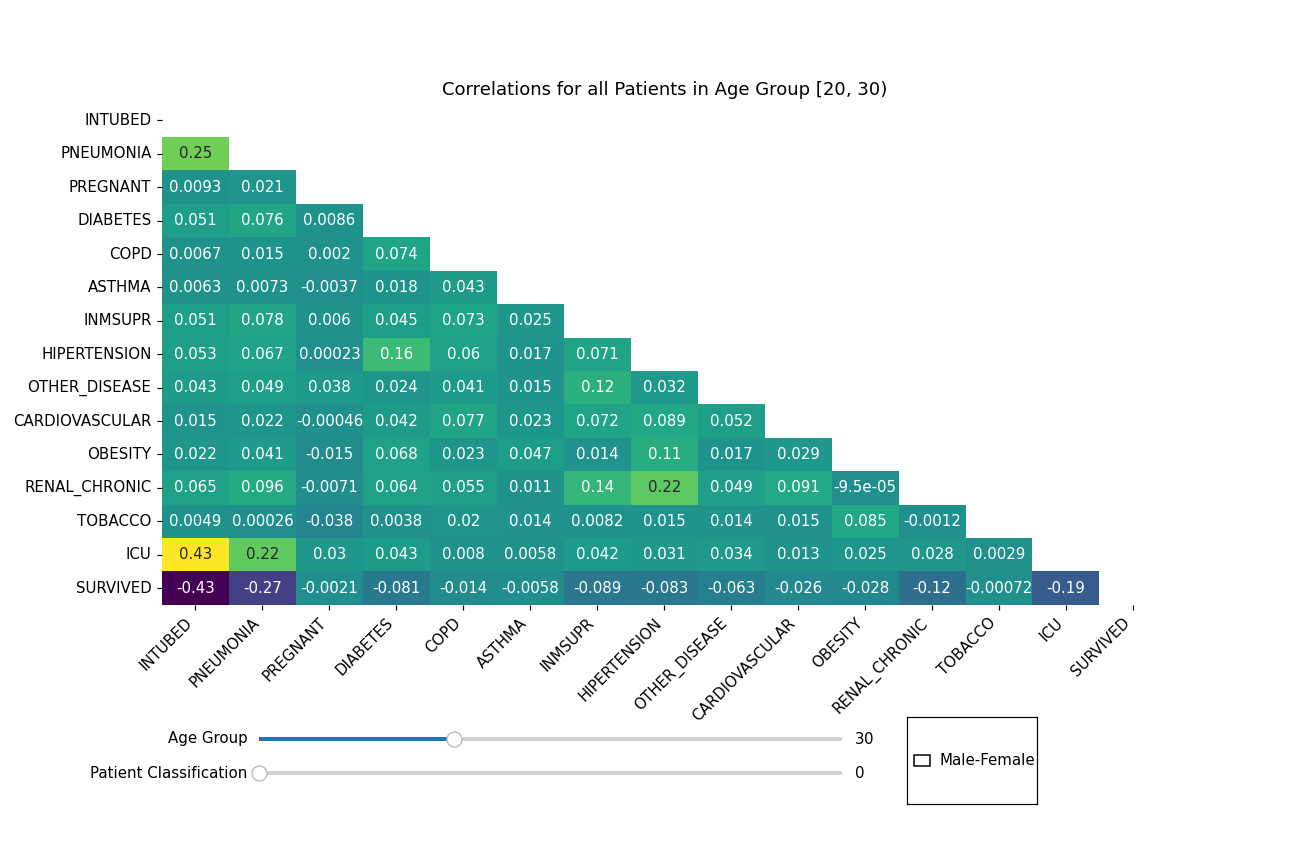

0

In [71]:
fig, ax = plt.subplots(figsize = (12, 8))

classifications_len = len(classifications_list)
age_group_len = len(age_group_order_list)

def update_heatmap(val):
    ax.clear()
    
    patient_type = classification_slider.val
    age_group = age_group_slider.val // 10
    mf_check = int(MF_checkbox.get_status()[0])
    
    df_key = tuple()
    title = ""
    
    mf_patients = "Patients"
    
    if mf_check:
        mf_patients = "Male (Lower)/Female (Upper) Patients"
    
    # patient_type = 0 = age_group
    # This corresponds to SCA_dict[0][("a", "a")]
    if (not patient_type) and (not age_group):
        df_key = ("a", "a")
        title = f"Correlations for all {mf_patients}"
        
    
    # patient_type > 0, age_group = 0
    # This corresponds to SCA_dict[0][(patient_type, "a")]
    elif (not age_group):
        df_key = (classifications_list[patient_type - 1], "a")
        title = f"Correlations for all Type {classifications_list[patient_type - 1]} {mf_patients}"
    
    # patient_type = 0, age_group > 0
    # This corresponds to SCA_dict[0][("a", age_group)]
    elif (not patient_type):
        df_key = ("a", age_group_order_list[age_group - 1])
        title = f"Correlations for all {mf_patients} in Age Group {age_group_order_list[age_group - 1]}"
        
    # patient_type > 0, age_group > 0
    # This corresponds to SCA_dict[0][(patient_type, age_group)]
    else:
        df_key = (classifications_list[patient_type - 1], age_group_order_list[age_group - 1])
        title = f"Correlations for all Type {classifications_list[patient_type - 1]} {mf_patients} in Age Group {age_group_order_list[age_group - 1]}"
    
    if not mf_check:
        
        data = SCA_dict[mf_check][df_key]

        mask = np.zeros_like(data)
        mask[np.triu_indices_from(mask)] = True


        corr_heatmap = sns.heatmap(ax = ax, 
                                   data = data, 
                                   center = 0,
                                   annot = True, 
                                   mask = mask, 
                                   cmap = "viridis", 
                                   cbar = False
                                  )

        # Rotate the horizontal labels to look nicer.
        corr_heatmap.set_xticklabels(corr_heatmap.get_xticklabels(), 
                                     rotation = 45,
                                     horizontalalignment = "right", 
                                     fontweight = "light"
                                    )
    
    # Accessing SCA_dict[1]
    # In this case, we display two heatmap simultaneously.
    # The lower one is Male, and uppoer one is Female,
    # separated by the main diagonal.
    else:
               
        M_corr, F_corr = SCA_dict[mf_check][df_key]
        
        M_mask = np.zeros_like(M_corr)
        M_mask[np.tril_indices_from(M_mask)] = True

        F_mask = np.zeros_like(F_corr)
        F_mask[np.triu_indices_from(F_mask)] = True

        M_heatmap = sns.heatmap(ax = ax, 
                                data = M_corr, 
                                center = 0,
                                annot = True, 
                                mask = M_mask, 
                                cmap = "Blues_r", 
                                cbar = False
                               )

        F_heatmap = sns.heatmap(ax = ax, 
                                data = F_corr, 
                                center = 0,
                                annot = True, 
                                mask = F_mask, 
                                cmap = "Reds_r", 
                                cbar = False
                               )
        
        # Rotate the horizontal labels to look nicer.
        M_heatmap.set_xticklabels(M_heatmap.get_xticklabels(), 
                                  rotation = 45,
                                  horizontalalignment = "right", 
                                  fontweight = "light"
                                  )
        
    
    # Set heatmap title    
    ax.set_title(title)
    
    plt.draw()

# Create room for sliders.    
plt.subplots_adjust(bottom = 0.3)

# Create the age_group slider
age_group_ax = plt.axes([0.2, 0.14, 0.45, 0.01], 
                     facecolor = "teal"
                    )



age_group_slider = Slider(age_group_ax, 
                          "Age Group",
                          valmin = 0,
                          valmax = 10 * age_group_len,
                          valinit = 0,
                          valstep = 10
                          )

# Create the patient classification slider
classification_ax = plt.axes([0.2, 0.1, 0.45, 0.01])

classification_slider = Slider(classification_ax, 
                          "Patient Classification",
                          valmin = 0,
                          valmax = classifications_len,
                          valinit = 0,
                          valstep = 1
                          )

# Create a checkbox to toggle between M/F and all.
MF_checkbox_ax = plt.axes([0.7, 0.07, 0.1, 0.1])
MF_choices = ["Male-Female"]
MF_check_state = [False]

MF_checkbox = CheckButtons(MF_checkbox_ax, 
                           MF_choices, 
                           MF_check_state
                          )

# Update the visual according to the checkbox
MF_checkbox.on_clicked(update_heatmap)    


# Update the visual according to the slider values
age_group_slider.on_changed(update_heatmap)
classification_slider.on_changed(update_heatmap)

Take the age group \[40, 50\) for instance.

All             |  Male-Female
:-------------------------:|:-------------------------:
<img src="img/heatmap_4050.jpg" style="width:800px;"/> |  <img src="img/heatmap_4050_mf.jpg" style="width:800px;"/>

The features `INTUBE`, `PENUMONIA` are associated with high mortality, followed by `ICU`. In particular, one can compute

$$\mathbb{P}\left( \operatorname{survive} \mid \operatorname{pneumonia} \right) \approx 0.618,$$
$$\mathbb{P}\left( \operatorname{survive} \mid \operatorname{no pneumonia} \right) \approx 0.976.$$

This phenomenon is presented in most age groups and patient types in our dataset, which is coherent with the findings in this [paper](https://pubmed.ncbi.nlm.nih.gov/33966261/).

# Predicting Patient's Risk with Deep Learning <a name = "dl"></a>

We build a deep learning model to predict patients' risk based on their current symptoms, status, and medical history. Our model is a dense neural network

<img src="img/model_summary.jpg" style="width:350px;"/>
and has performance

<img src="img/model_evaluation.jpg" style="width:350px;"/>


## Training-Validation-Testing Split

We begin by splitting the dataset into training, validation and testing parts.

In [47]:
dense_df = df

for boolean_column in boolean_columns:
    dense_df = dense_df[dense_df[boolean_column] <= 2]

In [48]:
dense_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019666 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   USMER                 1019666 non-null  int64   
 1   MEDICAL_UNIT          1019666 non-null  int64   
 2   SEX                   1019666 non-null  int64   
 3   PATIENT_TYPE          1019666 non-null  int64   
 4   INTUBED               1019666 non-null  int64   
 5   PNEUMONIA             1019666 non-null  int64   
 6   AGE                   1019666 non-null  int64   
 7   PREGNANT              1019666 non-null  int64   
 8   DIABETES              1019666 non-null  int64   
 9   COPD                  1019666 non-null  int64   
 10  ASTHMA                1019666 non-null  int64   
 11  INMSUPR               1019666 non-null  int64   
 12  HIPERTENSION          1019666 non-null  int64   
 13  OTHER_DISEASE         1019666 non-null  int64   
 14  CARDIOVASCULAR    

We need to convert Boolean features to dummy features for our deep learning model. In particular, the column `AGE` can be dropped since `AGE_GROUP` is presented here.

In [49]:
DL_columns = [column for column in dense_df.columns if column not in {"AGE", "SURVIVED"}]

In [50]:
X = pd.get_dummies(dense_df,
                       columns = DL_columns,
                       drop_first = True
                      )

X = X.drop(["AGE", "SURVIVED"] , axis = 1)

y = dense_df["SURVIVED"]

In [51]:
X.head()

,USMER_2,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,...,CLASIFFICATION_FINAL_7,ICU_2,"AGE_GROUP_[0, 10)","AGE_GROUP_[10, 20)","AGE_GROUP_[20, 30)","AGE_GROUP_[30, 40)","AGE_GROUP_[40, 50)","AGE_GROUP_[50, 60)","AGE_GROUP_[60, 70)","AGE_GROUP_[70, 80)"
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)

In [54]:
print(f"Training set size is {len(X_train) / len(X) * 100}%.")
print(f"Validation set size is {len(X_val) / len(X) * 100}%.")
print(f"Testing set size is {len(X_test) / len(X) * 100}%.")

Training set size is 59.99994115720245%.
Validation set size is 19.999980385734155%.
Testing set size is 20.000078457063392%.


## Deep Learning Model

We build the deep learning model under the framework `tensorflow 2.11.0`.

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
model = Sequential()

model.add(Dense(45, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(22, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(2, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

In [57]:
model.compile(loss = "binary_crossentropy",
              optimizer = "adam"
             )

In [58]:
EPOCHS = 100
BATCH_SIZE = 256

In [59]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           mode = 'min', 
                           verbose = 1, 
                           patience = 25
                          )

In [60]:
model.fit(x = X_train, 
          y = y_train,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          validation_data = (X_val, y_val),
          verbose = 1, 
          callbacks=[early_stop]
         )

Epoch 1/100
2390/2390 [==============================] - 9s 3ms/step - loss: 0.1933 - val_loss: 0.1150
Epoch 2/100
2390/2390 [==============================] - 7s 3ms/step - loss: 0.1464 - val_loss: 0.1151
Epoch 3/100
2390/2390 [==============================] - 7s 3ms/step - loss: 0.1429 - val_loss: 0.1160
Epoch 4/100
2390/2390 [==============================] - 8s 3ms/step - loss: 0.1413 - val_loss: 0.1170
Epoch 5/100
2390/2390 [==============================] - 7s 3ms/step - loss: 0.1410 - val_loss: 0.1156
Epoch 6/100
2390/2390 [==============================] - 8s 3ms/step - loss: 0.1402 - val_loss: 0.1122
Epoch 7/100
2390/2390 [==============================] - 8s 3ms/step - loss: 0.1405 - val_loss: 0.1147
Epoch 8/100
2390/2390 [==============================] - 8s 3ms/step - loss: 0.1401 - val_loss: 0.1158
Epoch 9/100
2390/2390 [==============================] - 8s 3ms/step - loss: 0.1403 - val_loss: 0.1146
Epoch 10/100
2390/2390 [==============================] - 8s 3ms/step - l

In [61]:
losses = pd.DataFrame(model.history.history)

In [62]:
%matplotlib inline

<AxesSubplot: >

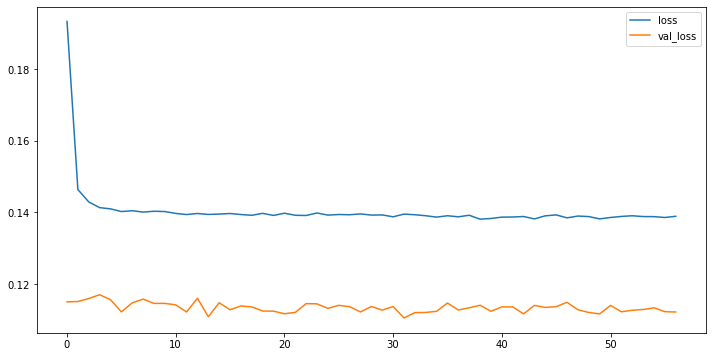

In [63]:
losses.plot(figsize = (12, 6))

# Model Evaluation <a name = "evaluation"></a>

We confusion matrix and classification report to evaluate our model's performance. We note that `predict_classes` has been removed from latest version of Keras. What `predict_classes` do is it predicts the class directly, whereas `predict` gives you the probability of each class. Since this is a binary classification problem, the output class is determined by whether the probability is bigger than 0.5.

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

6373/6373 [==============================] - 8s 1ms/step


In [66]:
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.37      0.52     14688
           1       0.95      0.99      0.97    189246

    accuracy                           0.95    203934
   macro avg       0.90      0.68      0.74    203934
weighted avg       0.95      0.95      0.94    203934



[[  5460   9228]
 [  1046 188200]]


Finally, we save our model.

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save("covid19.h5")